In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/Users/divyasandiman/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### The dataset has 26 integer columns and 9 object type columns
#### There are no null values in the dataset

In [12]:
cat_cols=[col for col in df.columns if df[col].dtypes=='O']
cat_cols
# Storing categorical columns in cat_cols for further use

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
num_cols=[col for col in df.columns if df[col].dtypes!='O']
num_cols
# Storing numerical columns in num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
for i in df[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]:
    print(df[i].value_counts())
    print('-----------------------------------------------')

No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------------------
Male      882
Female    588
Name: Gender, dtype: int64
-----------------------------------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Researc

#### From the value counts we have noticed that the 'Over 18' columns has only 1 value. Hence can be dropped

In [20]:
for i in df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]:
    print(df[i].value_counts())
    print('-----------------------------------------------')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-----------------------------------------------
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
-----------------------------------------------
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64
-------------

#### Agian in the numerical columns the Standard hours has only 1 value hence can be dropped

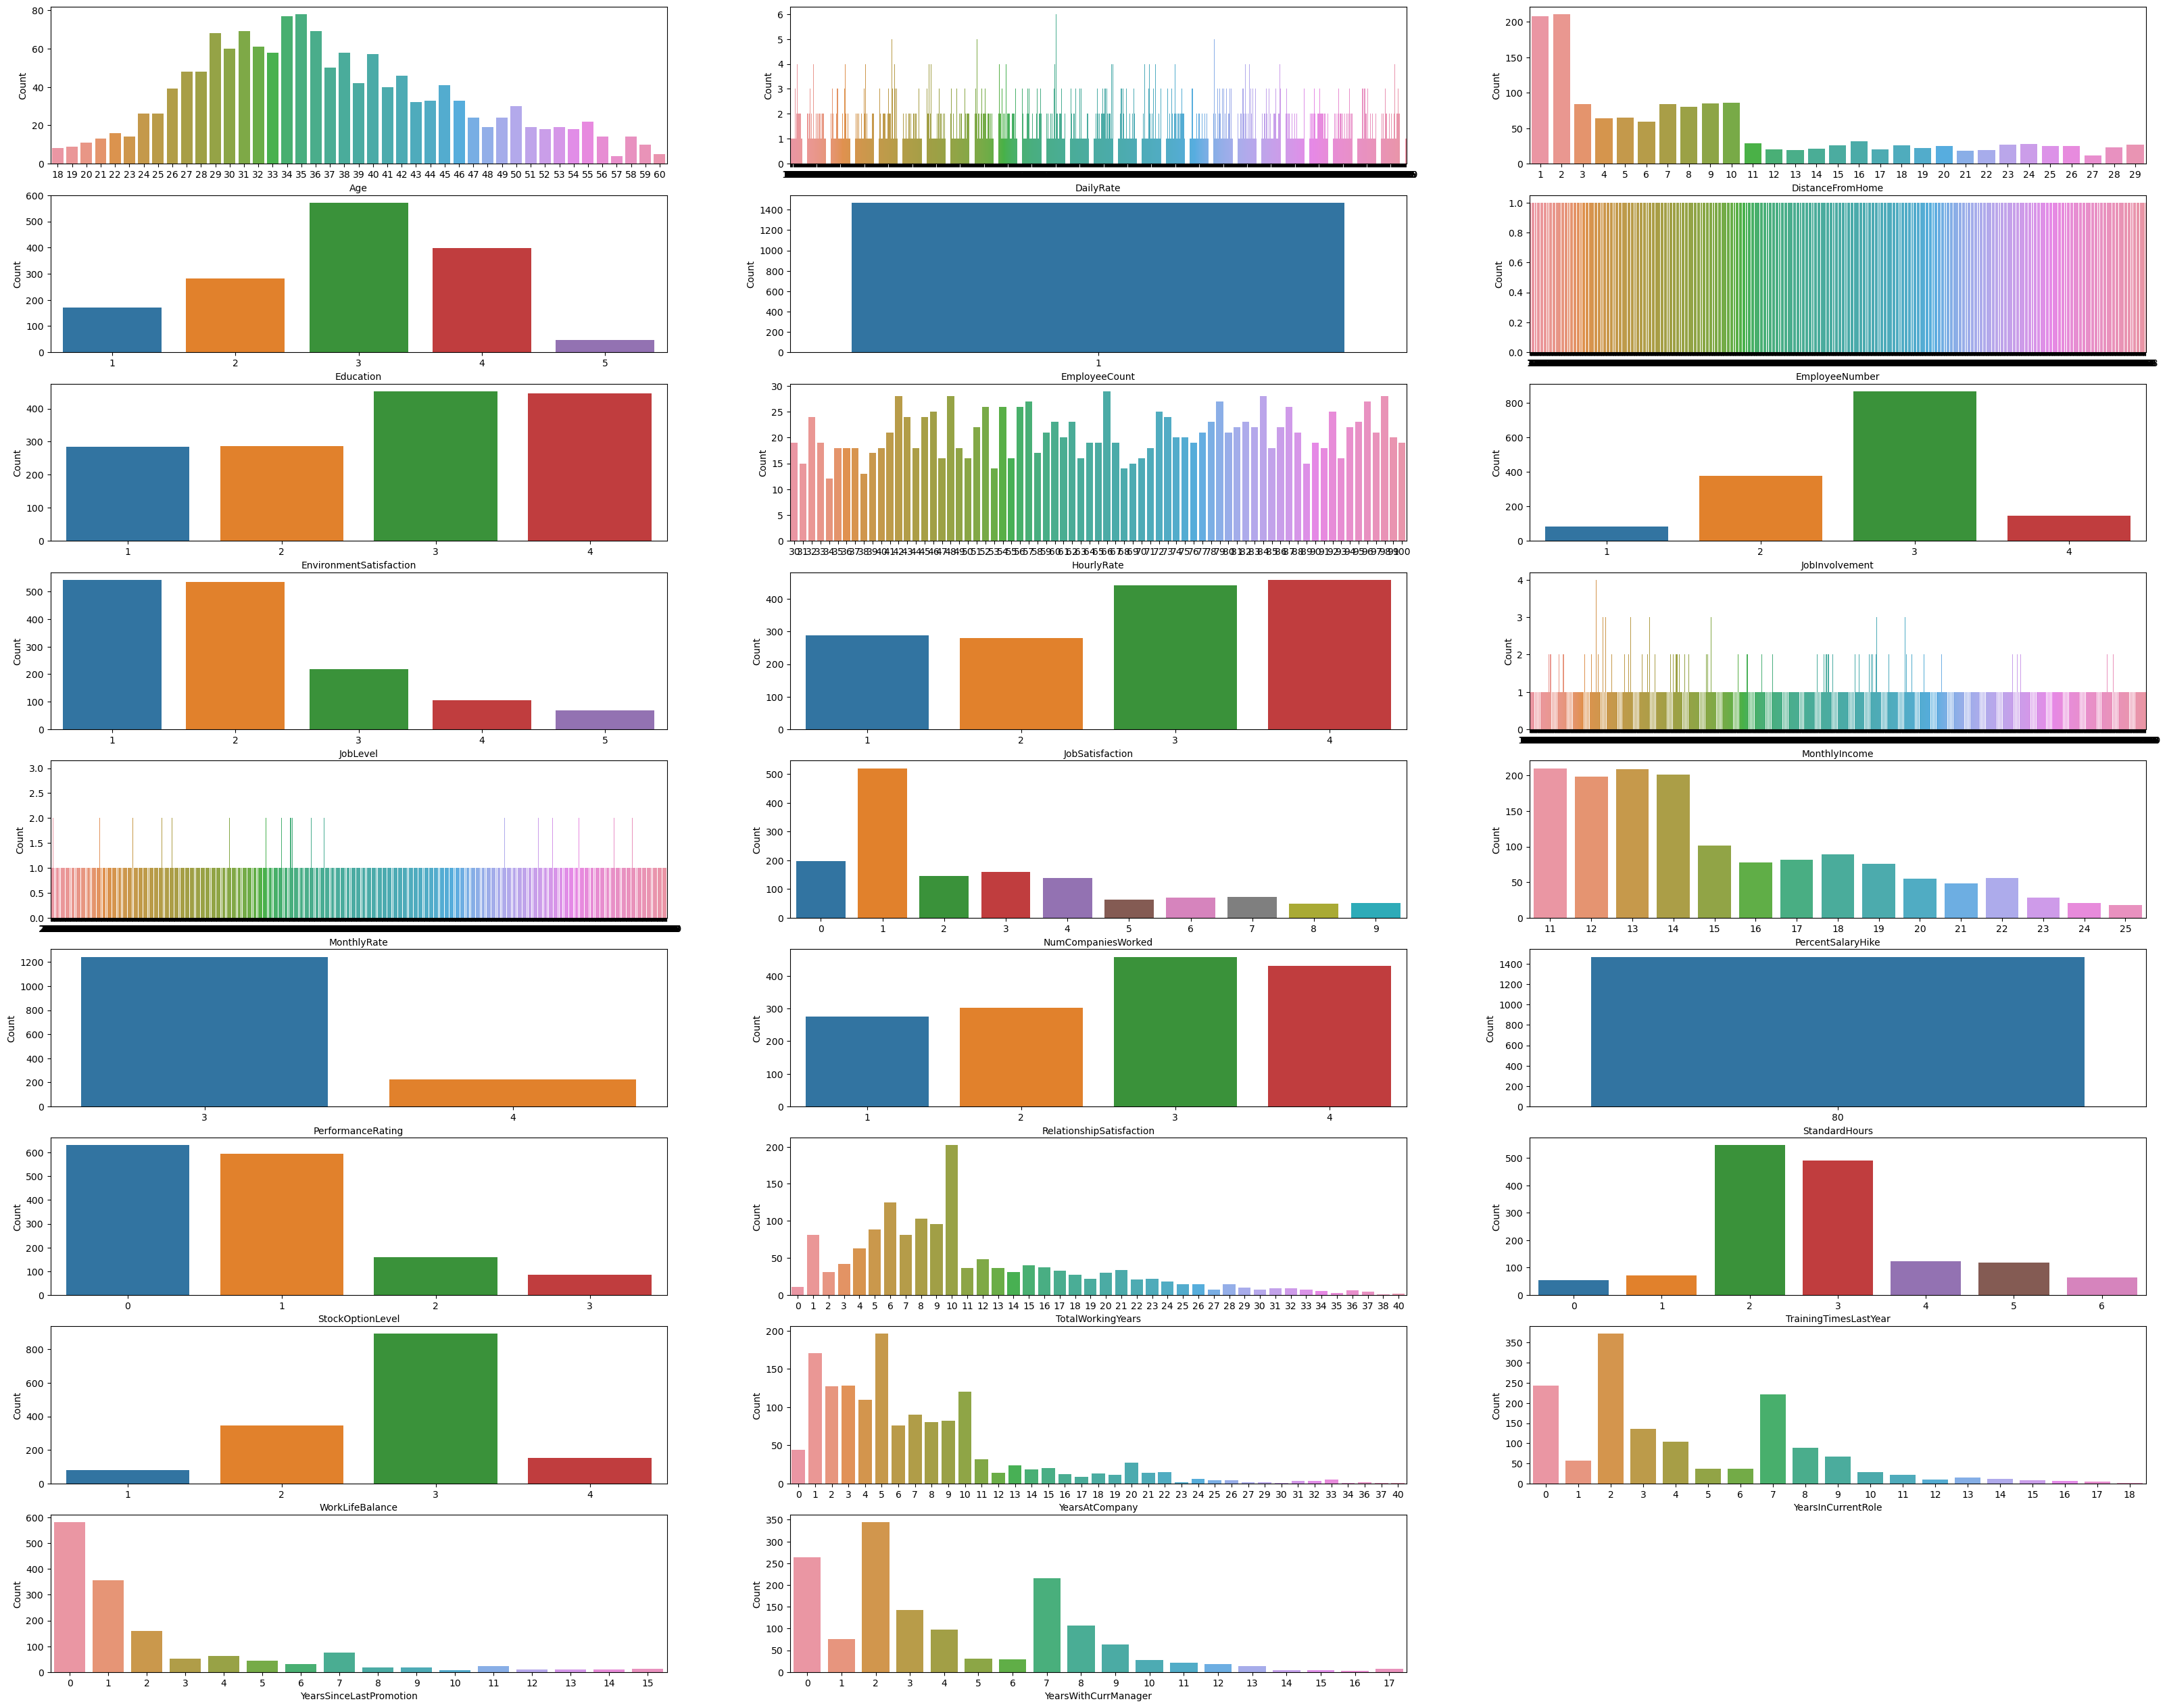

In [28]:
plt.figure(figsize=(40,32))
for num,i in enumerate(num_cols):
    plt.subplot(9,3,num+1)
    sns.countplot(x=i,data=df[num_cols])
    plt.ylabel('Count')
    plt.xlabel(i)
plt.show()

#### Standard Hours and employee count columns have only 1 unique value and hence we will drop it for it given no variable inputs to the model during training

In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

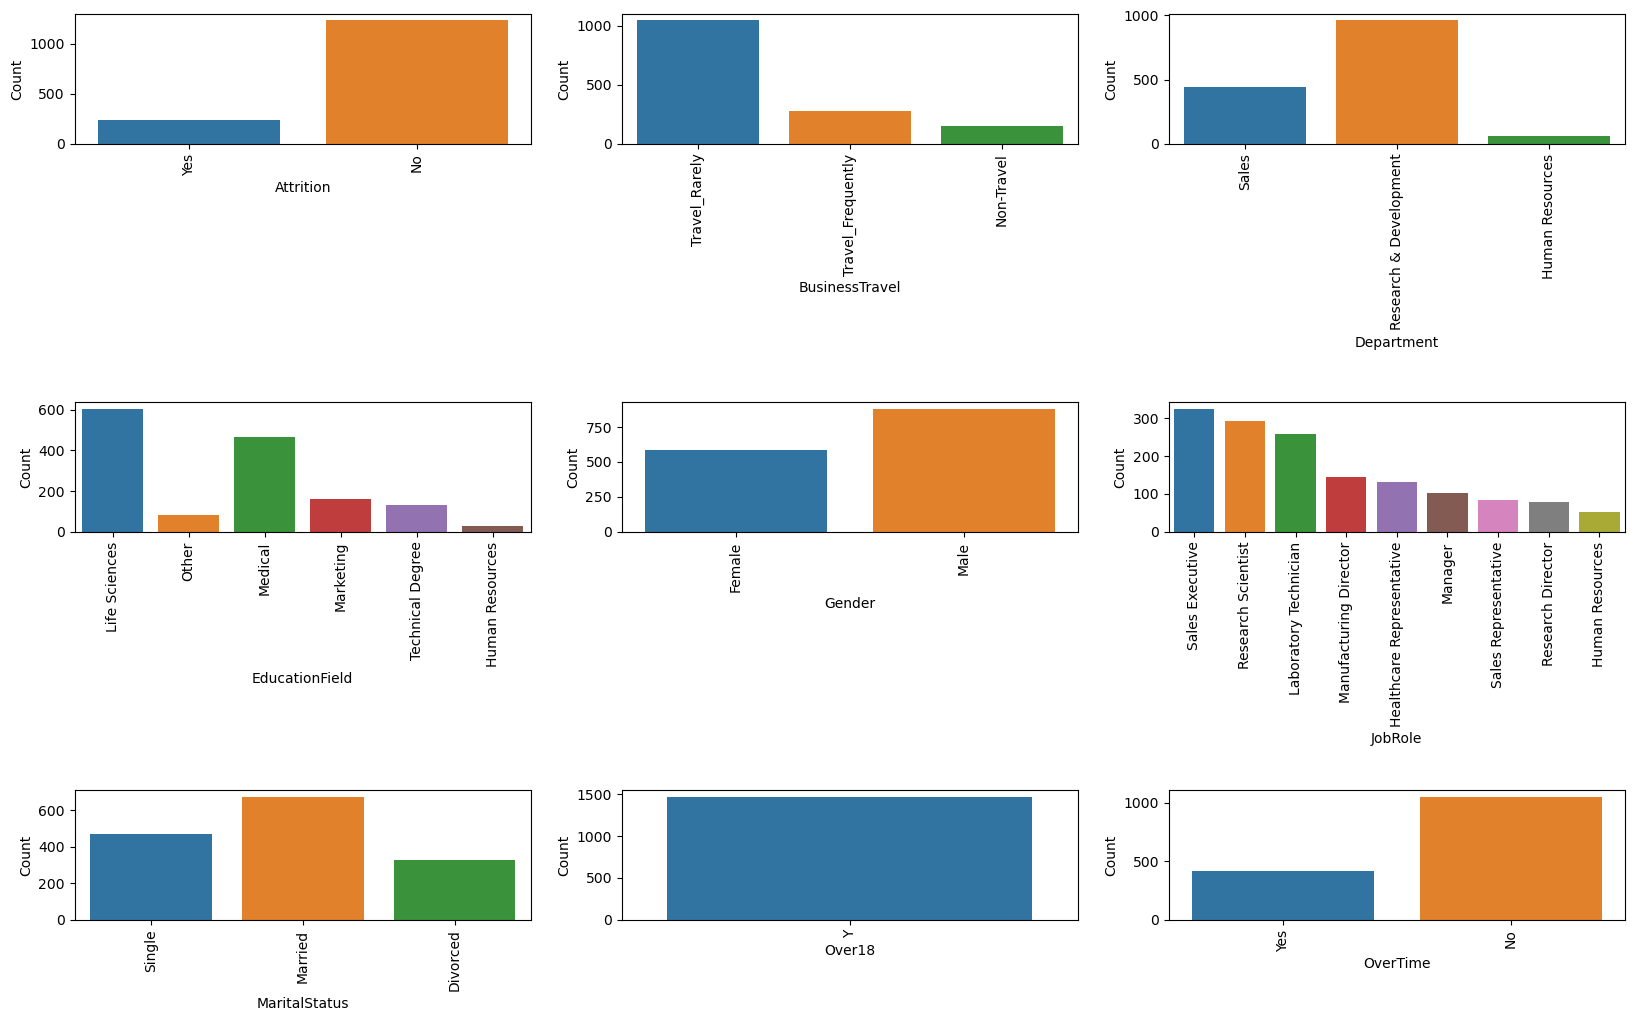

In [45]:
plt.figure(figsize=(20,42))
for num,i in enumerate(cat_cols):
    plt.subplot(9,3,num+1)
    sns.countplot(x=i,data=df[cat_cols])
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=2)
plt.show()

### Here there are some important derivation that we can make:
#### 1) There are 3 columns were there are 2 unique values OverTime, Gender and Attrition, of which Attrition is the target column. We will use LabelEncoder on this and OneHotEncoder() on the rest.
#### 2) Over 18 columns having only 1 unique value will be dropped
#### 3) There are some categories with more than 2 unique values. Like JobProfile has 9 unique values and Education field has 6 unique values. BusinessTravel, Department and MaritalStatus has 3 each. We will use target encoder on these columns.

In [31]:
df.isnull().sum().sum()

0

In [33]:
unique2_cols= [col for col in cat_cols if df[col].nunique() == 2]
# Extracting columns which has 2 unique values

In [34]:
unique2_cols

['Attrition', 'Gender', 'OverTime']

In [47]:
df['Over18'].value_counts() # Dropping over18 column

Y    1470
Name: Over18, dtype: int64

In [50]:
df.drop(['EmployeeCount','Over18'],axis=1,inplace=True)
df.drop(['EmployeeNumber'],axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)

Dropped 4 columns since 'EmployeeCount','Over18' & 'StandardHours'  only had a single unique value throughout which will provide no knowledge to the model. Also 'EmployeeNumber' is just a unique number for employee and hold no importance in model training.

In [82]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [78]:
x=df.drop('Attrition',axis=1) # Splitting data into x and y labels

In [105]:
y=df['Attrition']
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [107]:
le=LabelEncoder() # Creating instance of labelencoder

In [111]:
y=le.fit_transform(y) # Encoding the target variable y into 0's and 1's 
y

array([1, 0, 1, ..., 0, 0, 0])

In [80]:
x.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5


In [95]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [112]:
ohe=OneHotEncoder()
scaler=StandardScaler()
# Creating instance of onehotencoder and standard scaler

In [113]:
categorical_cols_ohe = ['Gender', 'MaritalStatus', 'OverTime']
categorical_cols_target = ['BusinessTravel', 'JobRole','Department', 'EducationField']
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Creating list of columns that has to be encoder with different encoders and standard scaler

In [114]:
transform = ColumnTransformer(
    transformers=[
        ('Scaler', scaler, numerical_cols),
        ('OneHotEncoder', ohe, categorical_cols_ohe),
        ('TargetEncoder', TargetEncoder(), categorical_cols_target)
    ],
    remainder='passthrough'
)


#### Created ColumnTransformer by the name transform 3 steps. First it scales the numerical columns, then uses OneHotEncoder on categorical columns with 2 unique values and then uses target encoder on the other categorical columns with 3 or more unique values. The remainder will be carried forward.

In [115]:
pipe=Pipeline(steps=[
    ('Preprocessing',transform),
    ('model',LogisticRegression())
])

### Created a pipeline by the name pipe that takes the transformer as 1st step and then creates a dummy model.

In [116]:
models=[
    { 
    'model':[RandomForestClassifier()],
    
    },
   {
    'model':[GradientBoostingClassifier()]
   
    },
    {

    'model':[SVC()]
    
    },
    {

    'model':[LogisticRegression()],

    }
]
# Creating a model grid that will be used for best model selection

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
# Splitting dataset into train and test

In [118]:
grid=GridSearchCV(pipe,models,cv=5,scoring='accuracy')
# Created instance of Gridsearch CV

In [119]:
grid.fit(x_train,y_train)
# Fitting training data to the model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                                                                          'PercentSalaryHike',...
                                                                        ('OneHotEncoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'OverTime']),
                                                                        ('TargetEncoder',
                                                                         TargetEncoder(),
                                                                         ['BusinessTravel',
                                                                          'JobRole',
                                                                          'Department',
                                                                          'EducationField'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [RandomForestClassifier()]},
                         {'model': [GradientBoostingClassifier()]},
                         {'model': [SVC()]},
                         {'model': [LogisticRegression()]}],
             scoring='accuracy')

In [120]:
grid.best_params_ # Logistic regresssion was selected as the best performing model

{'model': LogisticRegression()}

In [121]:
grid.best_score_ # Accuracy score is 86%

0.8622574828705373

In [124]:
params=[
    {

    'model':[LogisticRegression()],
    'model__C': [0.01, 0.1, 1],
    'model__max_iter': [100, 200, 300]
    }
]
# Now that we have our model, creating a new grid for parameter tuning

In [125]:
gscv=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
# New grid search to select the best parameters

In [126]:
gscv.fit(x_train,y_train) # Fitting training data into new model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                                                                          'PercentSalaryHike',...
                                                                          'YearsWithCurrManager']),
                                                                        ('OneHotEncoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'OverTime']),
                                                                        ('TargetEncoder',
                                                                         TargetEncoder(),
                                                                         ['BusinessTravel',
                                                                          'JobRole',
                                                                          'Department',
                                                                          'EducationField'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=1)],
                          'model__C': [0.01, 0.1, 1],
                          'model__max_iter': [100, 200, 300]}],
             scoring='accuracy')

In [127]:
gscv.best_params_ # Best Parameters selected are as below:

{'model': LogisticRegression(C=1), 'model__C': 1, 'model__max_iter': 100}

In [128]:
gscv.best_score_ # A score of 86% is good

0.8622574828705373

In [129]:
cl=gscv.best_estimator_ # Creating instance of the new model

In [198]:
pred=cl.predict(x_test) # Predicting test data

In [199]:
accuracy_score(y_test,pred) # Accuracy score of 91% sounds good

0.9081632653061225

In [214]:
newdata=x.iloc[0:3] # Creating new data to check predictions

In [219]:
print('Predicted values for newdata are: ',cl.predict(newdata))
print('Actual Values for target variable y are:',y[0:3])

Predicted values for newdata are:  [1 0 1]
Actual Values for target variable y are: [1 0 1]


# Predicted values are in sync with actuals. Hence the results are accurate and model is performing well